
# Project: No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">No show appointments Data Wrangling</a></li>
<li><a href="#eda">No show appointments Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

1. ‘ScheduledDay’ tells us on what day the patient set up their appointment.
2. ‘Neighborhood’ indicates the location of the hospital.
3. ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.


In [127]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling for No show appointments

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [128]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [129]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [130]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
print(df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')


In [131]:
df.rename(columns = {'SMS_received':'SMSReceived','No-show':'NoShow'}, inplace = True)
print(df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMSReceived', 'NoShow'],
      dtype='object')


In [132]:
df.rename(columns = {'Hipertension':'Hypertension','Handcap':'Handicap'}, inplace = True)
print(df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'NoShow'],
      dtype='object')


In [133]:
# Get unique values 
print(df.Scholarship.unique())
print(df.SMSReceived.unique())
print(df.NoShow.unique())
print(df.Hypertension.unique())
print(df.Handicap.unique())
print(df.Gender.unique())
print(df.Diabetes.unique())
print(df.Alcoholism.unique())

[0 1]
[0 1]
['No' 'Yes']
[1 0]
[0 1 2 3 4]
['F' 'M']
[0 1]
[0 1]


In [134]:
df['NoShow'].replace({'No':0,'Yes':1},inplace=True)

In [135]:
# Sort the age
sorted(df.Age.unique())

[-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 102,
 115]

In [136]:
# remove incorrect age data
df = df[(df.Age >= 0) & (df.Age <= 95)]
df.shape

(110480, 14)

In [137]:
df.AppointmentDay = df.AppointmentDay.apply(np.datetime64)
df.ScheduledDay   = df.ScheduledDay.apply(np.datetime64)

In [138]:
df['WaitingTime'] = df["AppointmentDay"].sub(df["ScheduledDay"], axis=0)
df["WaitingTime"] = (df["WaitingTime"] / np.timedelta64(1, 'D')).abs()
df['DayOfWeek'] = pd.to_datetime(df['AppointmentDay']).apply(lambda x: x.isoweekday())
df['Number of Missed Appointments'] = df.groupby('PatientId')['NoShow'].apply(lambda x: x.cumsum()) 

ageGroupLabels = [ "{0} - {1}".format(i, i + 19) for i in range(0, 120, 20)]
df['AgeGroup'] = pd.cut(df.Age, range(0, 121, 20), right=False, labels=ageGroupLabels)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110480 entries, 0 to 110526
Data columns (total 18 columns):
PatientId                        110480 non-null float64
AppointmentID                    110480 non-null int64
Gender                           110480 non-null object
ScheduledDay                     110480 non-null datetime64[ns]
AppointmentDay                   110480 non-null datetime64[ns]
Age                              110480 non-null int64
Neighbourhood                    110480 non-null object
Scholarship                      110480 non-null int64
Hypertension                     110480 non-null int64
Diabetes                         110480 non-null int64
Alcoholism                       110480 non-null int64
Handicap                         110480 non-null int64
SMSReceived                      110480 non-null int64
NoShow                           110480 non-null int64
WaitingTime                      110480 non-null float64
DayOfWeek                        110480 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

#### Questions

* Does the probability of no-show increases with Age, Waiting time or Appointments missed in the past?
* What is the overall appointment show-up vs. no show-up rate based on Gender and Age Group?
* What is the probability of showing up based on Day of the week?
* What is the probability of diseases and scholarship given to a no-show?
* What is the probability of showing up on number of handicaps a person presents?


### Research Question 1 : 
#### Does the probability of no-show increases with the following
#### * Waiting time
#### * Age
#### * Missed Appointments

In [139]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

def probility_of_patient_showing_up(dataset, group_by):    
    df = pd.crosstab(index = dataset[group_by], columns = dataset['NoShow']).reset_index()
    df['Probability of Showing Up'] = df[0] / (df[1] + df[0]) # df[0] means showing up and df[1] means no-show up
    return df[[group_by, 'Probability of Showing Up']] 

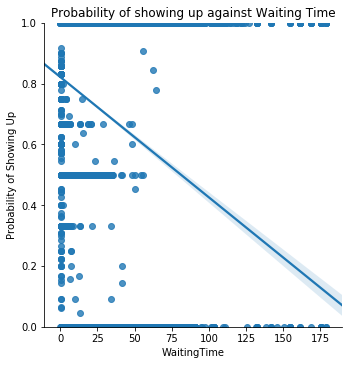

In [140]:
### Predict whether a patient shows up or not and plot them against the waiting time

sns.lmplot(data = probility_of_patient_showing_up(df, 'WaitingTime'), x='WaitingTime',  y='Probability of Showing Up', fit_reg=True)

plt.title('Probability of showing up against Waiting Time')

plt.ylim(0, 1)

plt.show()

##### Observations: The rate of patients showing up or not for their appointments has no dependency on waiting time period.

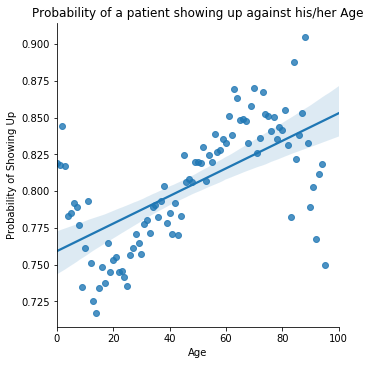

In [141]:
### Predict whether a patient shows up or not and plot them against their age

sns.lmplot(data = probility_of_patient_showing_up(df, 'Age'), x='Age', y='Probability of Showing Up', fit_reg=True)

plt.xlim(0, 100)

plt.title('Probability of a patient showing up against his/her Age')

plt.show()

##### Observations:
* The cancellation rates are higher for ages between 14 and 24 years
* The rate of patient showing up again decreases after around 80 year old patients

##### The rate of not showing up for medical appointments is highly dependent on the age.

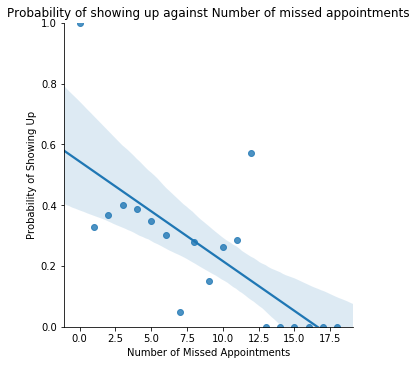

In [142]:
sns.lmplot(data = probility_of_patient_showing_up(df, 'Number of Missed Appointments'), x='Number of Missed Appointments', y='Probability of Showing Up', fit_reg=True)

plt.title('Probability of showing up against Number of missed appointments')

plt.ylim(0, 1)

plt.show()

##### Observations: The number of missed appointments, age and waiting time are good parameters for predicting no show up.

### Research Question 2 : 
#### What is the overall appointment show-up vs. no show-up rate based on age group and gender?

In [143]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

# Plot the proportions based on a variable vs number of appointments

def proportions_based_on_variable(df, variable):
    df_pie = df[variable].value_counts()
    ax = df_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12);
    ax.set_title(variable + ' (%) (Per appointment)\n', fontsize = 15);
    return np.round(df_pie/df.shape[0]*100,2)

0 - 19       27.53
40 - 59      27.22
20 - 39      26.13
60 - 79      16.12
80 - 99       3.00
100 - 119     0.00
Name: AgeGroup, dtype: float64

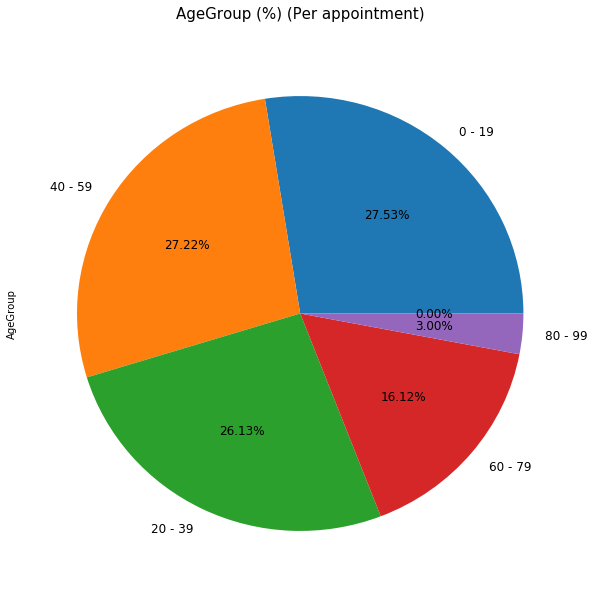

In [144]:
proportions_based_on_variable(df, 'AgeGroup')

F    64.99
M    35.01
Name: Gender, dtype: float64

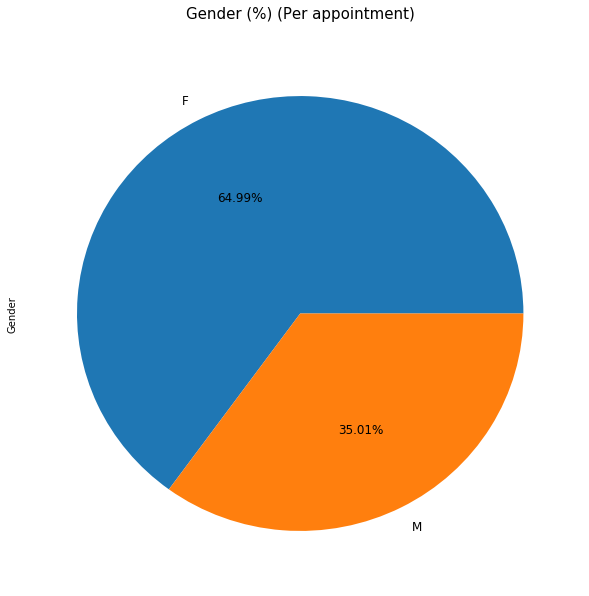

In [145]:
proportions_based_on_variable(df, 'Gender')

### Research Question 3 : 
#### What is the probability of showing up based on Day of the week?

In [146]:
def probability_based_on_category(df, group_by):
    rows = []
    for item in group_by:
        for level in df[item].unique():
            row = {'Condition': item}
            total = len(df[df[item] == level])
            n = len(np.array(df[(df[item] == level) & (df['NoShow'] == 0)], dtype = bool))
            row.update({'Level': level, 'Probability': n / total})
            rows.append(row)
    return pd.DataFrame(rows)

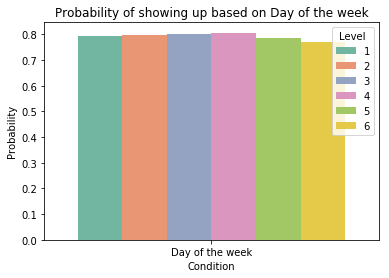

In [147]:
df['Day of the week'] = pd.to_datetime(df['AppointmentDay']).apply(lambda x: x.isoweekday())

sns.barplot(data = probability_based_on_category(df,['Day of the week']), x='Condition', y='Probability', hue='Level', palette='Set2')

plt.title('Probability of showing up based on Day of the week')

plt.ylabel('Probability')

plt.show()

###### Observations: Probability of showing up increases near mid week but reduces over the weekends

### Research Question 4 : 
#### What is the probability of diseases and scholarship given to a no-show?

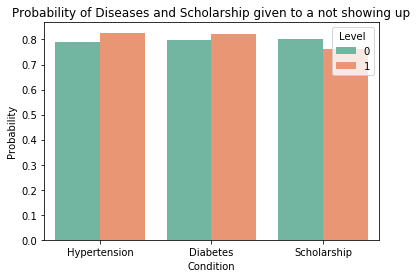

In [148]:
sns.barplot(data = probability_based_on_category(df,['Hypertension', 'Diabetes', 'Scholarship']), x='Condition', y='Probability', hue='Level', palette='Set2')

plt.title('Probability of Diseases and Scholarship given to a not showing up')

plt.ylabel('Probability')

plt.show()

###### Observations: The patient's diseases has nothing to do or we can say are not good parameter set for predicting if a patient will show up or not.

### Research Question 5 : 
#### What is the probability of showing up on number of handicaps a person presents?

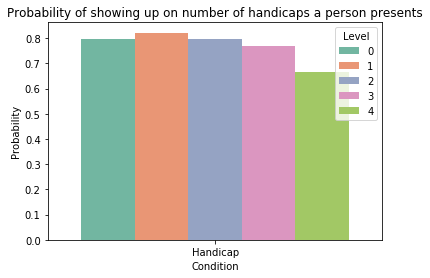

In [149]:
sns.barplot(data = probability_based_on_category(df,['Handicap']), x='Condition', y='Probability', hue='Level', palette='Set2')

plt.title('Probability of showing up on number of handicaps a person presents')

plt.ylabel('Probability')

plt.show()

###### Observations: There is more chance of a patient not showing up as number of handicaps increases, because probability of showing up decreases as there is a increase in number of handicaps a person presents more so after 2 handcaps.

<a id='conclusions'></a>
## Conclusions

* Ages from 14 to 24 years have higher cancellations rate.
* The rate of patient showing up again decreases after around 80 year old patients.
* The number of missed appointments, age and waiting time are good parameters for predicting no show up.
* The probability of showing up increases near mid week but reduces over the weekends.
* Diseases are not good parameters for predicting if a patient will show up or not.
* There is more chance of a patient not showing up if number of handicaps increases in a patient.

## Limitations

* There are negative values in the data set. For example: Age has outliers.
* It is not mentioned whether the given data set is a random one or not. Hence this may impact our analysis, observations and inferences that we have drawn or concluded here.

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!


